# Non-Text Data Exploration

In [1]:
!pip install pandas-profiling[notebook]
!pip install nltk
!pip install textblob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [3]:
# Read in MakeupAlley Reviews dataset
products = pd.read_csv('data/products.csv')
products.head()

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price
0,0,Blush - Orgasm,kyl77,36-43,21 days ago,This blush is suppose to be a universally flat...,5.0,65%,4.1,4
1,1,Blush - Orgasm,ladyinred29,44-55,25 days ago,This blush is a beautiful color. It isn't ter...,3.0,65%,4.1,4
2,2,Blush - Orgasm,BougieAngel,30-35,a month ago,After purchasing this I didn't want to touch i...,4.0,65%,4.1,4
3,3,Blush - Orgasm,Leahmoriah4,44-55,2 months ago,"I'm 48, Caucasian with olive undertones so tru...",5.0,65%,4.1,4
4,4,Blush - Orgasm,Avalonian1172,30-35,3 months ago,I have to mention that the case is fabulous. A...,4.0,65%,4.1,4


In [4]:
# quick data exploration with pandas profiling
profile = ProfileReport(products, title="MakeUpAlley Pandas Profiling Report", explorative=True)
profile.to_widgets()

Generate report structure: 100%|██████████| 1/1 [00:07<00:00,  7.84s/it]


In [4]:
print(products.shape)
print(products.info())

(10351, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10351 entries, 0 to 10350
Data columns (total 10 columns):
index         10351 non-null int64
product       10351 non-null object
user_id       10351 non-null object
age           10104 non-null object
date          10351 non-null object
review        10351 non-null object
ratings       10351 non-null float64
repurchase    10351 non-null object
packaging     10351 non-null float64
price         10351 non-null int64
dtypes: float64(2), int64(2), object(6)
memory usage: 808.8+ KB
None


In [5]:
# Check for presence of NaN values
products.isnull().sum()

index           0
product         0
user_id         0
age           247
date            0
review          0
ratings         0
repurchase      0
packaging       0
price           0
dtype: int64

In [6]:
# Replace rows with null values using most frequent Age Group
mode_age = products['age'].value_counts().head(1).index[0]
products['age'] = products['age'].fillna(mode_age)

# Check if there's still any null values
products.isnull().sum()

index         0
product       0
user_id       0
age           0
date          0
review        0
ratings       0
repurchase    0
packaging     0
price         0
dtype: int64

In [7]:
products['product'].value_counts()
# Most popular product is Blush - Orgasm

Blush - Orgasm         5332
Blush - Deep Throat    1165
Blush - Sin             766
Blush - Torrid          497
Blush - Exhibit A       371
Blush - Amour           310
Blush - Luster          302
Blush - Angelika        297
Mata Hari Blush         272
Blush - Taj Mahal       262
Super Orgasm            249
Blush - Madly           248
Blush - Dolce Vita      155
Blush - Sex Appeal      125
Name: product, dtype: int64

In [8]:
products['user_id'].value_counts()
# Drop this feature because too many values but possible to explore if a user writing more reviews lead to higher likelihood of repurchasing

LayoverLifestyle       13
kathrynb23             12
JGardella              11
carrasco               10
izzybella               9
tenderheart003          9
ruby_tea_roses          9
syeung2                 8
pakirani                8
GimpyPoop               8
stilagrrrl              8
Katie75007              8
DanielleWilliams        7
MsPsylocke              7
trempot                 7
Hothead                 7
ashergill               7
Cygentte3               7
sarahfeeni              7
bunny207                7
pmnixa                  7
LaciP504                7
JessiDayle              7
sanrosee                6
delhi                   6
Horny                   6
maliastyle              6
semarie                 6
sonnie_art              6
ncdecolover             6
                       ..
lilacmess               1
KaiserMimiVII           1
strokegirl              1
kawiki                  1
boobear28               1
desertrose              1
ash10twenty             1
darlingvikki

In [9]:
products['date'].value_counts()
# Drop '14 years ago' and above, regroup 'months ago' rows as 'a year ago'

11 years ago     1337
12 years ago     1236
10 years ago     1117
13 years ago      880
17 years ago      759
16 years ago      719
9 years ago       699
14 years ago      697
15 years ago      673
18 years ago      633
8 years ago       542
7 years ago       336
6 years ago       228
5 years ago       141
19 years ago      132
4 years ago        81
3 years ago        48
2 years ago        34
20 years ago       25
a year ago         18
7 months ago        3
3 months ago        2
10 months ago       2
8 months ago        2
9 months ago        1
a month ago         1
6 months ago        1
5 months ago        1
25 days ago         1
2 months ago        1
21 days ago         1
Name: date, dtype: int64

In [10]:
products['price'].value_counts()
# Drop this feature because not useful

4    10351
Name: price, dtype: int64

In [11]:
products['ratings'].value_counts()
# This will be our target variable, will be changing it to binary instead

5.0    5563
4.0    2393
3.0    1403
2.0     673
1.0     319
Name: ratings, dtype: int64

In [12]:
products['age'].value_counts()

19-24        3994
25-29        2539
30-35        1601
36-43         873
Under 18      872
44-55         384
56 & Over      88
Name: age, dtype: int64

In [13]:
products['packaging'].value_counts()
# Generally Good packaging rating because at least 4/5

4.1    5581
4.2    2351
4.3    2109
4.4     310
Name: packaging, dtype: int64

In [14]:
products['repurchase'].value_counts()
# All are above 50% repurchase rating

65%    5332
79%    1490
81%    1413
86%    1178
88%     302
85%     262
57%     249
75%     125
Name: repurchase, dtype: int64

In [15]:
products.groupby(['product'])['repurchase'].value_counts()
# Every product only has 1 repurchase rating, cannot be used to decide if one reviewer is more likely to repurchase

product              repurchase
Blush - Amour        86%            310
Blush - Angelika     79%            297
Blush - Deep Throat  81%           1165
Blush - Dolce Vita   79%            155
Blush - Exhibit A    86%            371
Blush - Luster       88%            302
Blush - Madly        81%            248
Blush - Orgasm       65%           5332
Blush - Sex Appeal   75%            125
Blush - Sin          79%            766
Blush - Taj Mahal    85%            262
Blush - Torrid       86%            497
Mata Hari Blush      79%            272
Super Orgasm         57%            249
Name: repurchase, dtype: int64

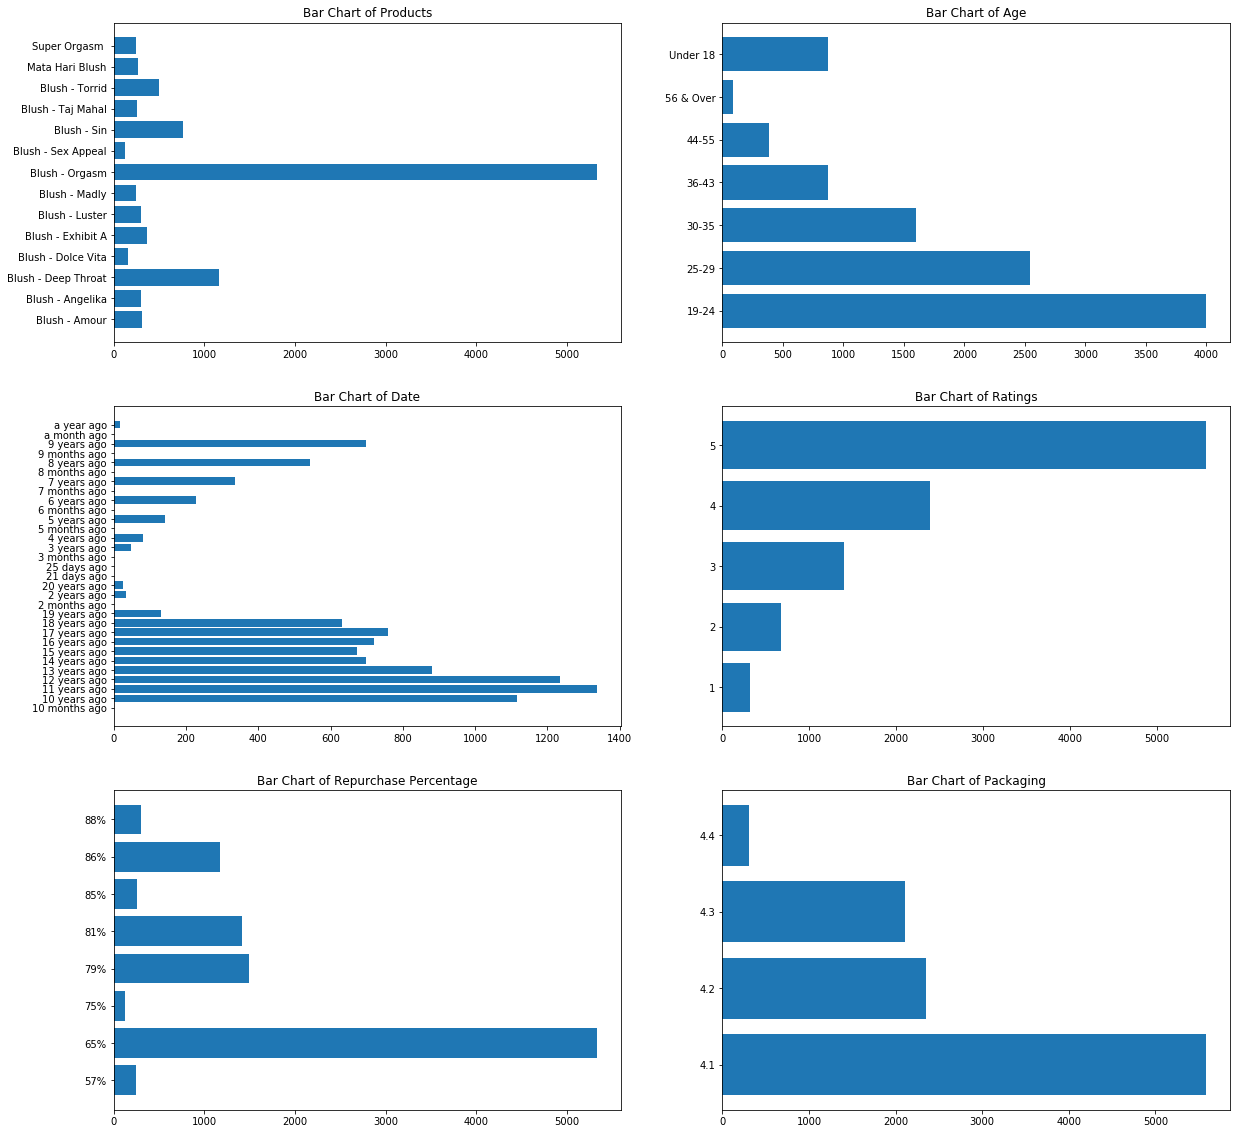

In [16]:
# Plot distribution for Product, Age, Date, Ratings, Repurchase and Packaging
fig, ax = plt.subplots(3,2,figsize=(20,20))

ax[0,0].barh(products['product'].value_counts().sort_index().index,products['product'].value_counts().sort_index().values)
ax[0,0].title.set_text('Bar Chart of Products')
ax[0,1].barh(products['age'].value_counts().sort_index().index,products['age'].value_counts().sort_index().values)
ax[0,1].title.set_text('Bar Chart of Age')

ax[1,0].barh(products['date'].value_counts().sort_index().index,products['date'].value_counts().sort_index().values)
ax[1,0].title.set_text('Bar Chart of Date')
ax[1,1].barh(products['ratings'].value_counts().sort_index().index,products['ratings'].value_counts().sort_index().values)
ax[1,1].title.set_text('Bar Chart of Ratings')

ax[2,0].barh(products['repurchase'].value_counts().sort_index().index,products['repurchase'].value_counts().sort_index().values)
ax[2,0].title.set_text('Bar Chart of Repurchase Percentage')
ax[2,1].barh(products['packaging'].astype(str).value_counts().sort_index().index,products['packaging'].astype(str).value_counts().sort_index().values)
ax[2,1].title.set_text('Bar Chart of Packaging')

# Most of the reviewers are millennials (reasonable, follows expectations)
# Repurchase percentages are generally quite high (all >= 50%)
# Overall Ratings are also generally quite high (more than half gave 5/5)
# Packaging rating also generally quite high (at least 4/5 stars)
# Reasonable and follows expectations because NARS is a famous makeup brand with high quality pigmented products

# Text Data Exploration

In [17]:
from langdetect import detect
from wordcloud import WordCloud
import re

In [18]:
# Check for random sample of reviews
pd.set_option('display.max_colwidth', 200)
products['review'].sample(n=10)

691     my second go-to blush. Looks supremely flattering and healthy with a bit of sheen on the cheeks. Lasts forever. Good pigmentation\r\n\r\nCons: packaging could be a bit messy because it's quite pow...
7727    I purchased this at Sephora for $27. I had gone into Sephora prior to purchasing this and requested a sample of NARS Orgasm simply because I wanted to see if it lived up to the hype. I found it pr...
4390    Really pretty very light pinkish color - really pretty on cheeks, however i need lots and lots of swipes before i can get any color on my cheeks - wish it's a little bit more pigmented - a little ...
5488    Nars' blush in 'Deep Throat' is my favourite blush, year round. The coral-pink colour and gold flecks give this warm glow to your skin. As an NC37 shade, I love this colour when my skin is tanned,...
345     This is a classic for a reason and deserves all the praise it gets. This is one of my favorite Nars blushes and by far the one I wear the most. It is completely

count    10351.000000
mean       449.610859
std        348.451299
min          0.000000
25%        232.000000
50%        366.000000
75%        567.000000
max       6000.000000
Name: review_length, dtype: float64


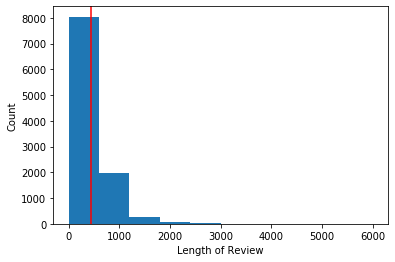

In [19]:
products['review_length'] = products['review'].apply(lambda x: len(x.strip()))

plt.hist(products['review_length'])
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.axvline(x=products['review_length'].mean(), color='red')
print(products['review_length'].describe())

# Most reviews have sufficient number of characters for analysis, average of 450 words

In [20]:
# Check for review with 0 length
products[products['review_length'] == 0]

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length
466,696,Blush - Orgasm,oppositeofdog,Under 18,7 years ago,,5.0,65%,4.1,4,0


In [21]:
# Remove the review 
products = products[products['review_length'] > 0]

In [22]:
# Check for current min review length
products['review_length'].describe()

count    10350.000000
mean       449.654300
std        348.440102
min          4.000000
25%        232.000000
50%        366.000000
75%        567.000000
max       6000.000000
Name: review_length, dtype: float64

In [25]:
# Check for review with small length to see if sufficient for analysis
products[products['review_length'] <= 10]

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length
26,36,Blush - Orgasm,Abelaine,36-43,2 years ago,I love it,5.0,65%,4.1,4,9
126,186,Blush - Orgasm,AnnaScrimgeour,25-29,5 years ago,Good,5.0,65%,4.1,4,4
274,409,Blush - Orgasm,linehmor,19-24,6 years ago,its okey.,4.0,65%,4.1,4,9
512,767,Blush - Orgasm,mariacristinatoca,36-43,7 years ago,Amazing!,5.0,65%,4.1,4,8
1565,2345,Blush - Orgasm,Odaa,19-24,10 years ago,Love <3,5.0,65%,4.1,4,7
2953,4428,Blush - Orgasm,lisagibb,25-29,13 years ago,love it!,5.0,65%,4.1,4,8
3067,4597,Blush - Orgasm,car123,19-24,13 years ago,love it!,5.0,65%,4.1,4,8
3891,5836,Blush - Orgasm,princesslori431,19-24,15 years ago,LOVE IT,5.0,65%,4.1,4,7
3967,5947,Blush - Orgasm,Acnetha,Under 18,15 years ago,its ok,3.0,65%,4.1,4,6
4005,6005,Blush - Orgasm,strony123,25-29,15 years ago,Great!,3.0,65%,4.1,4,6


In [26]:
# Check if reviews are in English
products['english'] = products['review'].apply(lambda x: detect(x) == 'en')

In [27]:
products['english'].value_counts()

True     10327
False       23
Name: english, dtype: int64

In [29]:
# Check for random sample of English reviews
products[products['english'] == True].sample(n=5)

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length,english
6411,9621,Blush - Deep Throat,veronicaleo,19-24,17 years ago,I don't have Orgasm (didn't show up on me) so I can't compare the two but I do love this blush. I use it when I want a soft pink/peach look. I don't think this one is as pigmented as my other NA...,4.0,81%,4.2,4,351,True
5272,7908,Blush - Orgasm,karenclark46,19-24,19 years ago,"I adore this. It's the perfect summer color for anyone. It gives a hint of shimmer and definition to cheek bones, and the packaging is lovely. Definately a worth while product. :)",5.0,65%,4.1,4,183,True
9160,13752,Blush - Angelika,kisstheradio,19-24,9 years ago,"Bought this a little while ago and I like it. Personally, it's not a color that I can just slap on every day - it's a little cool-toned on my NC25 skin - but it's very pigmented, and the the glitt...",4.0,79%,4.3,4,469,True
9983,14990,Blush - Torrid,petitepoire,19-24,11 years ago,"i love NARS and i have a collection of NARS blushes, but this is one of the very few colors that just didn't work out for me, Madly being the other color that just didn't work for me. I wear peach...",4.0,86%,4.2,4,826,True
3453,5178,Blush - Orgasm,wavingcat5,30-35,14 years ago,"I loved this blush and used it for ages, also in combination with Nars Mata Hari (a deep rosy shade) blush as demoed on me at Mecca Cosmetica. Easy to wear as a 'no-make-up' look too. I used it wi...",3.0,65%,4.1,4,1062,True


In [30]:
# Check to see which review are wrongly classified as english == False
products[products['english'] == False]

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length,english
23,33,Blush - Orgasm,mixen,25-29,2 years ago,Best colour!,5.0,65%,4.1,4,12,False
26,36,Blush - Orgasm,Abelaine,36-43,2 years ago,I love it,5.0,65%,4.1,4,9,False
126,186,Blush - Orgasm,AnnaScrimgeour,25-29,5 years ago,Good,5.0,65%,4.1,4,4,False
512,767,Blush - Orgasm,mariacristinatoca,36-43,7 years ago,Amazing!,5.0,65%,4.1,4,8,False
580,870,Blush - Orgasm,Marivale,36-43,8 years ago,"Es uno de mis blush preferidos, de un tono rosado muy sentador que se funde bien con la piel. Es apropiado para tonos de piel claros a medios, y tiene un shimmer que ilumina la piel dÃ¡ndole un t...",4.0,65%,4.1,4,275,False
1565,2345,Blush - Orgasm,Odaa,19-24,10 years ago,Love <3,5.0,65%,4.1,4,7,False
2447,3667,Blush - Orgasm,AllieRae,19-24,12 years ago,love love LOVE!,5.0,65%,4.1,4,15,False
2919,4374,Blush - Orgasm,jalovette,30-35,12 years ago,Excellent colour,5.0,65%,4.1,4,16,False
2953,4428,Blush - Orgasm,lisagibb,25-29,13 years ago,love it!,5.0,65%,4.1,4,8,False
3067,4597,Blush - Orgasm,car123,19-24,13 years ago,love it!,5.0,65%,4.1,4,8,False


In [31]:
# Drop Non-English reviews
not_eng = [580, 7285, 8205]
products = products.drop(index=not_eng)
products = products.drop(['english'],axis=1)
products

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length
0,0,Blush - Orgasm,kyl77,36-43,21 days ago,"This blush is suppose to be a universally flattering color. I'm not sure if that is actually possible, but I do think it would flatter a lot of different skin tones. I'm fair with cool undertones,...",5.0,65%,4.1,4,565
1,1,Blush - Orgasm,ladyinred29,44-55,25 days ago,"This blush is a beautiful color. It isn't terribly pigmented imho, but it gives a lovely glow on my fair, cool skin, and it is luminescent.\n\nThe problem I have with this product is the packagin...",3.0,65%,4.1,4,574
2,2,Blush - Orgasm,BougieAngel,30-35,a month ago,"After purchasing this I didn't want to touch it coz it was soo pretty! I love the colour, pigment and texture, and the packaging is also awesome. Not much into makeup but blush is always in my bea...",4.0,65%,4.1,4,331
3,3,Blush - Orgasm,Leahmoriah4,44-55,2 months ago,"I'm 48, Caucasian with olive undertones so true pinks and mauves look terrible and corals are perfect which is why I LOVE this blush. I love the shimmer on my cheek bones and temples and use Clin...",5.0,65%,4.1,4,893
4,4,Blush - Orgasm,Avalonian1172,30-35,3 months ago,I have to mention that the case is fabulous. All my other blushes are great but the case breaks towards the end of its use. This one is strong. Still together. Why can't other brands make their ca...,4.0,65%,4.1,4,331
5,5,Blush - Orgasm,summerseabreeze,30-35,5 months ago,A coral-pink peach blush with a very fine gold shimmer - which on my medium-olive skin tone (MAC NC40) seems to emphasize more of the gold than it does for example on my friend who's a MAC NC15. F...,5.0,65%,4.1,4,1835
6,6,Blush - Orgasm,miransees,30-35,6 months ago,"I'm not sure if it's a ""Universal"" color. It's probably too light for me. It does make my skin look natural though, there is something more a women wants from a blusher. Also it's so small that it...",3.0,65%,4.1,4,314
7,7,Blush - Orgasm,outofherhead,56 & Over,7 months ago,"The blush that works for everyone does not work for me. I got it in the mini size. I don’t know, on me it just looks like gold glitter, very sparkly, maybe my skin tone is too dark.",2.0,65%,4.1,4,181
8,8,Blush - Orgasm,beddy,25-29,8 months ago,"i am super late on the Orgasm train but i must admit, i was alway more drawn to Deep Thoart because it doesnt have the gold shimmers. I got a generous sample card from Nars and decide why not. Thi...",4.0,65%,4.1,4,1127
9,9,Blush - Orgasm,BigSwingingOvaries,30-35,8 months ago,"This is one of the few blushes I've ever repurchased. It's a great every day glowy blush. However, each time I've bought this, the product has been slightly different (e.g. size of shimmer particl...",4.0,65%,4.1,4,894


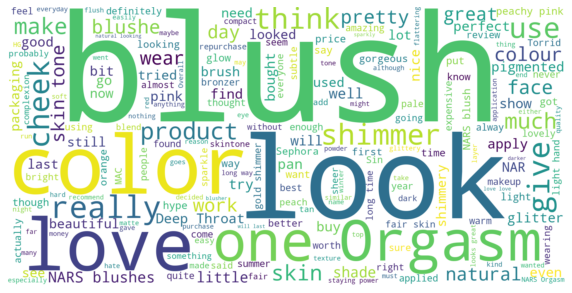

In [32]:
# Wordcloud
all_reviews = " ".join(r for r in products['review'])

# Create and generate a word cloud image
wordcloud = WordCloud(background_color="white", width=2000, height=1000).generate(all_reviews)

# Display the generated image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
# Top 20 Words
tokens = products['review'].apply(lambda row: row.split(" "))

words = tokens.apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                  .sum(axis=0)\
                  .to_frame()\
                  .reset_index()\
                  .sort_values(by=0,ascending=False)

words.columns = ['word','occurences']

words.head(20)

#Most common words are stop-words and a domain specific word (blush)

,word,occurences
1766,I,22402.0
3364,a,14085.0
3605,and,13446.0
10076,the,12495.0
6914,it,10857.0
6904,is,7792.0
10177,to,7740.0
10111,this,7296.0
4269,but,7020.0
7686,my,6583.0


# Non-Text Data Pre-processing

In [45]:
# Drop not useful columns
products.drop(columns=['df_index','price','user_id'], inplace=True)

In [46]:
# Drop data from more than 13 years ago and regroup 'months ago' rows to 'a year ago'
# Drop older years and group months to first year
products['date'] = products['date'].apply(lambda x: x.split(" ")[0] if 'year' in x else 1)
products['date'] = products['date'].apply(lambda x: 1 if x=='a' else int(x))
products['date'] = products['date'].apply(lambda x: -int(x))
products = products[products['date'] >= -13]

In [47]:
# Check if the dates are formatted correctly
products['date'].value_counts()

-11    1337
-12    1236
-10    1117
-13     880
-9      699
-8      541
-7      333
-6      228
-5      141
-4       81
-3       48
-2       34
-1       34
Name: date, dtype: int64

In [62]:
# Convert repurchase column to numerical
products['repurchase'] = products['repurchase'].apply(lambda x : float(x.strip('%'))/100)

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [48]:
# Relabel 'ratings' column to repurchase again (1) if ratings 4/5 else won't repurchase again (0)
products['repurchase_again'] = products['ratings'].apply(lambda x: 0 if float(x) < 4 else 1 )
products.drop(['ratings'], axis=1, inplace=True)
products.head()

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Gladys Koh\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,product,age,date,review,repurchase,packaging,review_length,repurchase_again
0,Blush - Orgasm,36-43,-1,"This blush is suppose to be a universally flattering color. I'm not sure if that is actually possible, but I do think it would flatter a lot of different skin tones. I'm fair with cool undertones,...",65%,4.1,565,1
1,Blush - Orgasm,44-55,-1,"This blush is a beautiful color. It isn't terribly pigmented imho, but it gives a lovely glow on my fair, cool skin, and it is luminescent.\n\nThe problem I have with this product is the packagin...",65%,4.1,574,0
2,Blush - Orgasm,30-35,-1,"After purchasing this I didn't want to touch it coz it was soo pretty! I love the colour, pigment and texture, and the packaging is also awesome. Not much into makeup but blush is always in my bea...",65%,4.1,331,1
3,Blush - Orgasm,44-55,-1,"I'm 48, Caucasian with olive undertones so true pinks and mauves look terrible and corals are perfect which is why I LOVE this blush. I love the shimmer on my cheek bones and temples and use Clin...",65%,4.1,893,1
4,Blush - Orgasm,30-35,-1,I have to mention that the case is fabulous. All my other blushes are great but the case breaks towards the end of its use. This one is strong. Still together. Why can't other brands make their ca...,65%,4.1,331,1


In [50]:
products['repurchase_again'].value_counts()
# No need to account for class imbalance

1    5078
0    1631
Name: repurchase_again, dtype: int64

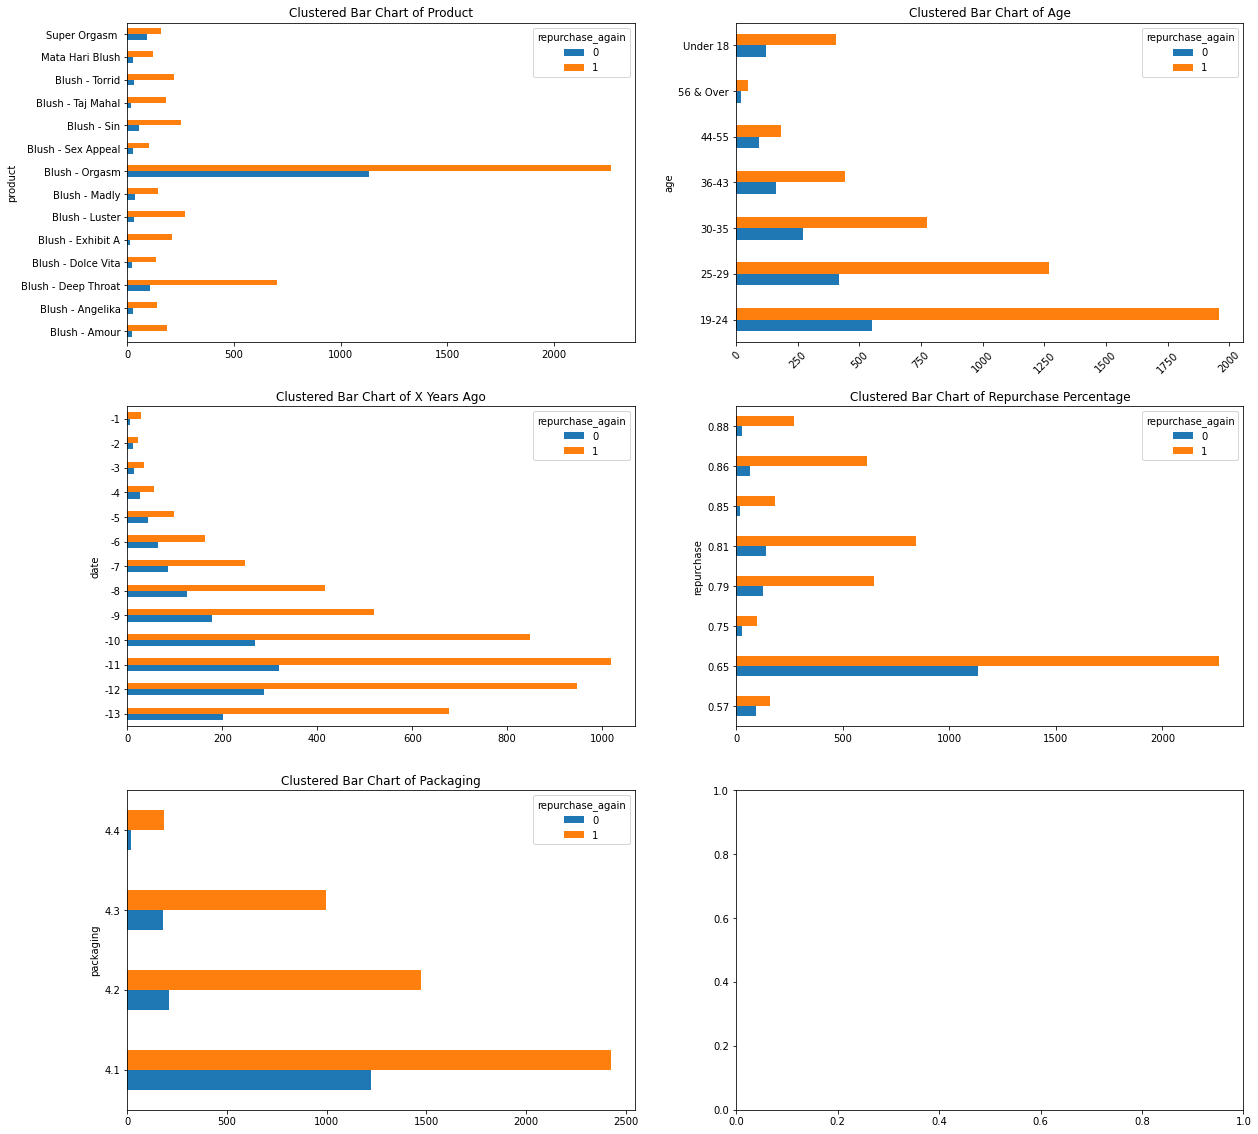

In [71]:
# Plot distribution for Product, Age, Date, Repurchase and Packaging
fig, ax = plt.subplots(3,2,figsize=(20,20))
products.groupby(['product','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[0,0])
ax[0,0].title.set_text('Clustered Bar Chart of Product')
ax[0,0].tick_params(axis='x', labelrotation=0)

products.groupby(['age','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[0,1])
ax[0,1].title.set_text('Clustered Bar Chart of Age')
ax[0,1].tick_params(axis='x', labelrotation=45)

products.groupby(['date','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[1,0])
ax[1,0].title.set_text('Clustered Bar Chart of X Years Ago')
ax[1,0].tick_params(axis='x', labelrotation=0)

products.groupby(['repurchase','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[1,1])
ax[1,1].title.set_text('Clustered Bar Chart of Repurchase Percentage')
ax[1,1].tick_params(axis='x', labelrotation=0)

products.groupby(['packaging','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[2,0])
ax[2,0].title.set_text('Clustered Bar Chart of Packaging')
ax[2,0].tick_params(axis='x', labelrotation=0)

# Generally, most people are willing to repurchase in every category
# 65% Repurchase Percentage, Blush - Orgasm and 4.1 Packaging Rating have a much higher proportion of those not willing to repurchase; should analyze these groups 

<AxesSubplot:title={'center':'packaging'}, xlabel='repurchase_again'>

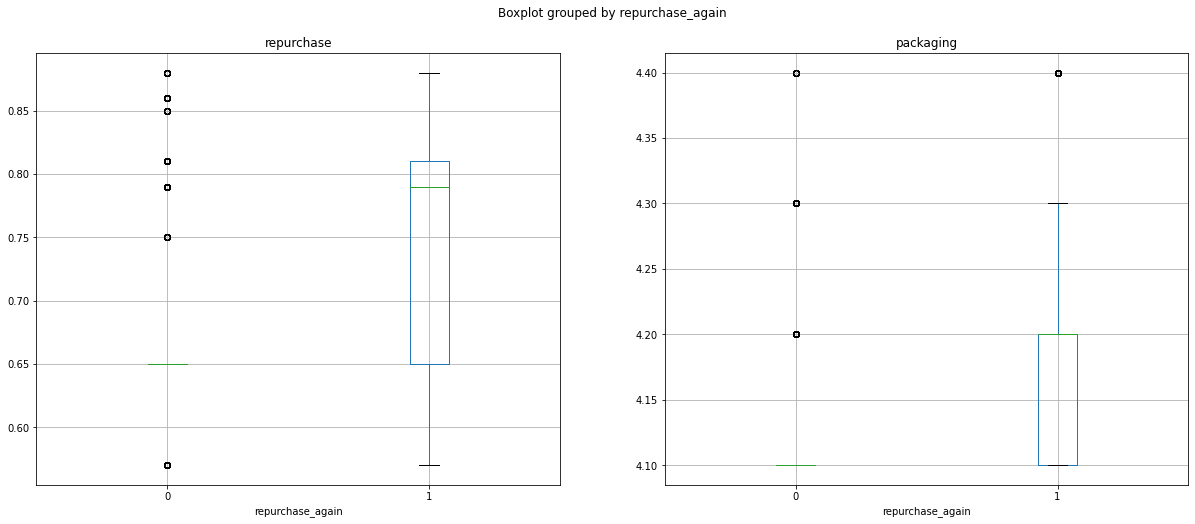

In [83]:
# Boxplot of repurchase and packaging attributes by repurchase_again
fig, ax = plt.subplots(1,2,figsize=(20,8))
products.boxplot('repurchase', by='repurchase_again', ax=ax[0])
products.boxplot('packaging', by='repurchase_again', ax=ax[1])
# Those likely to repurchase again have give higher repurchase ratings and packaging ratings

In [113]:
products.corr()

,date,repurchase,packaging,review_length,repurchase_again
date,1.000000,-0.035761,-0.028066,0.035664,-0.031140
repurchase,-0.035761,1.000000,0.826698,0.078359,0.239515
packaging,-0.028066,0.826698,1.000000,0.077316,0.203742
review_length,0.035664,0.078359,0.077316,1.000000,0.014176
repurchase_again,-0.031140,0.239515,0.203742,0.014176,1.000000


# Text Data Preprocessing

In [109]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from textblob import TextBlob, Word

[nltk_data] Downloading package stopwords to C:\Users\Gladys
[nltk_data]     Koh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Gladys
[nltk_data]     Koh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [110]:
# Remove line breaks
def remove_breaks(text):
  text = re.sub(r'\r', '', text)
  return re.sub(r'\n', '', text)

products['review_processed'] = products['review'].apply(lambda x: remove_breaks(x))

ipykernel_launcher:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [111]:
# Remove links
def remove_urls(text):
  text = re.sub(r'http.?://[^\s]+[\s]?', '', text)
  text = re.sub(r'[^\s]+.com', '', text)
  return re.sub(r'www.[^\s]+', '', text)

products['review_processed'] = products['review_processed'].apply(lambda x: remove_urls(x))

ipykernel_launcher:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [112]:
# Covert to lowercase
products['review_processed_lower'] = products['review_processed'].apply(lambda x: x.lower())

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [114]:
# Expand Contractions
contractions_dict = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

# Function to perform expansion of contractions
def expand_contractions(text, contraction_mapping=contractions_dict):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

products['review_processed'] = products['review_processed'].apply(lambda x : expand_contractions(x,contractions_dict))
products['review_processed_lower'] = products['review_processed_lower'].apply(lambda x : expand_contractions(x,contractions_dict))

ipykernel_launcher:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [115]:
# Remove punctuations
products['review_processed_lower_punc'] = products['review_processed_lower'].str.replace('[^\w\s]','')
products['review_processed_punc'] = products['review_processed'].str.replace('[^\w\s]','')

ipykernel_launcher:2: FutureWarning: The default value of regex will change from True to False in a future version.
ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:3: FutureWarning: The default value of regex will change from True to False in a future version.
ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [116]:
# Remove digits (including words that contain digits because makeup products)
products['review_processed'] = products['review_processed'].apply(lambda x: re.sub('\w*\d\w*','', x))
products['review_processed_lower'] = products['review_processed_lower'].apply(lambda x: re.sub('\w*\d\w*','', x))
products['review_processed_lower_punc'] = products['review_processed_lower_punc'].apply(lambda x: re.sub('\w*\d\w*','', x))
products['review_processed_punc'] = products['review_processed_punc'].apply(lambda x: re.sub('\w*\d\w*','', x))

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be

In [117]:
# Lemmatization
products['review_processed'] = products['review_processed'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split(" ")]))
products['review_processed_lower'] = products['review_processed_lower'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split(" ")]))
products['review_processed_lower_punc'] = products['review_processed_lower_punc'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split(" ")]))
products['review_processed_punc'] = products['review_processed_punc'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split(" ")]))

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be

In [118]:
# Remove extra whitespaces
products['review_processed'] = products['review_processed'].apply(lambda x: x.strip())
products['review_processed_lower'] = products['review_processed_lower'].apply(lambda x: x.strip())
products['review_processed_lower_punc'] = products['review_processed_lower_punc'].apply(lambda x: x.strip())
products['review_processed_punc'] = products['review_processed_punc'].apply(lambda x: x.strip())

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be

In [119]:
# Check sample of preprocessed reviews
review_sample = products[['review', 'review_processed', 'review_processed_lower', 'review_processed_lower_punc', 'review_processed_punc']].sample(n=10)
review_sample

,review,review_processed,review_processed_lower,review_processed_lower_punc,review_processed_punc
1579,this by far the best blush iv tried and i realy love blushers it goes perfect on my skin and last me all day i realy hope people can c the real effect of it,this by far the best blush iv tried and i realy love blusher it go perfect on my skin and last me all day i realy hope people can c the real effect of it,this by far the best blush iv tried and i realy love blusher it go perfect on my skin and last me all day i realy hope people can c the real effect of it,this by far the best blush iv tried and i realy love blusher it go perfect on my skin and last me all day i realy hope people can c the real effect of it,this by far the best blush iv tried and i realy love blusher it go perfect on my skin and last me all day i realy hope people can c the real effect of it
7379,"This is def one of my favorite NARS blushes...I wasn't sure at first because it wasn't rated the highest but this is one of those beautiful universal colors for me. It is a ""barely there"" pink, i...","This is def one of my favorite NARS blushes...I wa not sure at first because it wa not rated the highest but this is one of those beautiful universal color for me. It is a ""barely there"" pink, it...","this is def one of my favorite nars blushes...i wa not sure at first because it wa not rated the highest but this is one of those beautiful universal color for me. it is a ""barely there"" pink, it...",this is def one of my favorite nars blushesi wa not sure at first because it wa not rated the highest but this is one of those beautiful universal color for me it is a barely there pink it is mor...,This is def one of my favorite NARS blushesI wa not sure at first because it wa not rated the highest but this is one of those beautiful universal color for me It is a barely there pink it is mor...
5967,"I bought this because of the 'hype' around it. I got it this morning and I was a little dissapointed. The color does not suit my skintone, and it's not a 'special' color i.c.w the price.","I bought this because of the hype around it. I got it this morning and I wa a little dissapointed. The color doe not suit my skintone, and it is not a special color i.c.w the price.","i bought this because of the hype around it. i got it this morning and i wa a little dissapointed. the color doe not suit my skintone, and it is not a special color i.c.w the price.",i bought this because of the hype around it i got it this morning and i wa a little dissapointed the color doe not suit my skintone and it is not a special color icw the price,I bought this because of the hype around it I got it this morning and I wa a little dissapointed The color doe not suit my skintone and it is not a special color icw the price
7760,"I think this is a slightly pinker version of Orgasm and it's a really nice color. Personally, I don't mind the gold glitter as most of it just falls off while you apply it. The texture is smooth a...","I think this is a slightly pinker version of Orgasm and it is a really nice color. Personally, I do not mind the gold glitter a most of it just fall off while you apply it. The texture is smooth a...","i think this is a slightly pinker version of orgasm and it is a really nice color. personally, i do not mind the gold glitter a most of it just fall off while you apply it. the texture is smooth a...",i think this is a slightly pinker version of orgasm and it is a really nice color personally i do not mind the gold glitter a most of it just fall off while you apply it the texture is smooth and ...,I think this is a slightly pinker version of Orgasm and it is a really nice color Personally I do not mind the gold glitter a most of it just fall off while you apply it The texture is smooth and ...
3033,"I don't see what the big deal is. I bought it expecting some miraculous beautification, but it was just another blush. And a blush that is not worth $25 imo. I mean, don't get me wr

# Feature Engineering

In [120]:
from sklearn import preprocessing
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Gladys
[nltk_data]     Koh\AppData\Roaming\nltk_data...


True

In [121]:
# Conduct One-hot Encoding for Product and Age because they are nominal data (have to remove 1 dummy variable column to remove multi-collinearity problem)
products = pd.concat([products, pd.get_dummies(products['product'], prefix='product', drop_first=True)], axis=1)
products = pd.concat([products, pd.get_dummies(products['age'], prefix='age', drop_first=True)], axis=1)
products.drop(columns=['product','age'], inplace=True)

In [123]:
products.head(5)

,age,date,review,repurchase,packaging,review_length,repurchase_again,review_processed,review_processed_lower,review_processed_lower_punc,...,product_Blush - Exhibit A,product_Blush - Luster,product_Blush - Madly,product_Blush - Orgasm,product_Blush - Sex Appeal,product_Blush - Sin,product_Blush - Taj Mahal,product_Blush - Torrid,product_Mata Hari Blush,product_Super Orgasm
0,36-43,-1,"This blush is suppose to be a universally flattering color. I'm not sure if that is actually possible, but I do think it would flatter a lot of different skin tones. I'm fair with cool undertones,...",0.65,4.1,565,1,"This blush is suppose to be a universally flattering color. I am not sure if that is actually possible, but I do think it would flatter a lot of different skin tones. I am fair with cool undertone...","this blush is suppose to be a universally flattering color. i am not sure if that is actually possible, but i do think it would flatter a lot of different skin tones. i am fair with cool undertone...",this blush is suppose to be a universally flattering color i am not sure if that is actually possible but i do think it would flatter a lot of different skin tone i am fair with cool undertone and...,...,0,0,0,1,0,0,0,0,0,0
1,44-55,-1,"This blush is a beautiful color. It isn't terribly pigmented imho, but it gives a lovely glow on my fair, cool skin, and it is luminescent.\n\nThe problem I have with this product is the packagin...",0.65,4.1,574,0,"This blush is a beautiful color. It is not terribly pigmented imho, but it give a lovely glow on my fair, cool skin, and it is luminescent.The problem I have with this product is the packaging. ...","this blush is a beautiful color. it is not terribly pigmented imho, but it give a lovely glow on my fair, cool skin, and it is luminescent.the problem i have with this product is the packaging. ...",this blush is a beautiful color it is not terribly pigmented imho but it give a lovely glow on my fair cool skin and it is luminescentthe problem i have with this product is the packaging i have...,...,0,0,0,1,0,0,0,0,0,0
2,30-35,-1,"After purchasing this I didn't want to touch it coz it was soo pretty! I love the colour, pigment and texture, and the packaging is also awesome. Not much into makeup but blush is always in my bea...",0.65,4.1,331,1,"After purchasing this I did not want to touch it coz it wa soo pretty! I love the colour, pigment and texture, and the packaging is also awesome. Not much into makeup but blush is always in my bea...","after purchasing this i did not want to touch it coz it wa soo pretty! i love the colour, pigment and texture, and the packaging is also awesome. not much into makeup but blush is always in my bea...",after purchasing this i did not want to touch it coz it wa soo pretty i love the colour pigment and texture and the packaging is also awesome not much into makeup but blush is always in my beauty ...,...,0,0,0,1,0,0,0,0,0,0
3,44-55,-1,"I'm 48, Caucasian with olive undertones so true pinks and mauves look terrible and corals are perfect which is why I LOVE this blush. I love the shimmer on my cheek bones and temples and use Clin...",0.65,4.1,893,1,"I am , Caucasian with olive undertone so true pink and mauve look terrible and coral are perfect which is why I LOVE this blush. I love the shimmer on my cheek bone and temple and use Clinique Ch...","i am , caucasian with olive undertone so true pink and mauve look terrible and coral are perfect which is why i love this blush. i love the shimmer on my cheek bone and temple and use clinique ch...",i am caucasian with olive undertone so true pink and mauve look terrible and coral are perfect which is why i love this blush i love the shimmer on my cheek bone and temple and use clinique chub...,...,0,0,0,1,0,0,0,0,0,0
4,30-35,-1,I have to mention that the case is fabulous. All my other blushes are great but the case breaks towards the end of its use. This one is strong. Still together. Why can't other brands make their ca...,0

In [125]:
# Initialise VADER Sentiment Analyser
analyzer = SentimentIntensityAnalyzer()

Check whether lowercase and punctuations affect VADER sentiment score

In [126]:
review_sample_scores = pd.DataFrame(columns = ['Text']+list(review_sample.columns))

for row in range(len(review_sample)):
    result = {}
    
    for col in review_sample.columns:
        vs = analyzer.polarity_scores(review_sample[col].iloc[row])
        result[col] = vs['compound']
    
    review_sample_scores = review_sample_scores.append(result, ignore_index=True)
    
review_sample_scores['Text'] = review_sample['review'].reset_index(drop=True)

In [127]:
review_sample_scores

,Text,review,review_processed,review_processed_lower,review_processed_lower_punc,review_processed_punc
0,this by far the best blush iv tried and i realy love blushers it goes perfect on my skin and last me all day i realy hope people can c the real effect of it,0.9432,0.9432,0.9432,0.9432,0.9432
1,"This is def one of my favorite NARS blushes...I wasn't sure at first because it wasn't rated the highest but this is one of those beautiful universal colors for me. It is a ""barely there"" pink, i...",0.9582,0.9582,0.9582,0.9582,0.9582
2,"I bought this because of the 'hype' around it. I got it this morning and I was a little dissapointed. The color does not suit my skintone, and it's not a 'special' color i.c.w the price.",0.0000,-0.3089,-0.3089,-0.3089,-0.3089
3,"I think this is a slightly pinker version of Orgasm and it's a really nice color. Personally, I don't mind the gold glitter as most of it just falls off while you apply it. The texture is smooth a...",0.4754,0.4754,0.4754,0.4754,0.4754
4,"I don't see what the big deal is. I bought it expecting some miraculous beautification, but it was just another blush. And a blush that is not worth $25 imo. I mean, don't get me wrong, it's nice ...",0.9688,0.9757,0.9757,0.9731,0.9731
5,"very expensive, but it really is all its cracked up to be. I had heard that this shade matches every skin tone, and was skeptical, but im a believer! worth the 25 bucks. use it every day, and has ...",0.5255,0.7574,0.7574,0.7351,0.7351
6,"I think this is a brilliant highlighter, but not the worlds greatest blusher. I use my regular blusher then sweep this over my cheek bones. The golden shimmer is subtle and catches the light reall...",-0.0161,-0.0161,-0.0161,-0.0161,-0.0161
7,"A gorgeous sandy apricot blush! No pink whatsoever here, it's a straight-up warm shade with microshimmer and that incomparable NARS texture. Easy to blend, looks simply great and hard to overdo.\r...",0.8908,0.8908,0.8908,0.8834,0.8834
8,This blush is ABSOLUTELY BEAUTIFUL on my brown (with yellow undertones) skin! I'm not a big fan of blush because a lot of times it makes women look overdone. But this nicely pigmented coral color ...,0.9820,0.9820,0.9886,0.9881,0.9809
9,"I originally thought this was another overrated product. As time has gone by, I find that I reach for this blush more than any others that I own (probably ten or more)\r\nI don't care for the cas...",0.9293,0.9376,0.9376,0.9376,0.9376


**i think vader score works best with unprocessed data coz vader helps to process it alr somehow HAHAHH should we use vader for sentiment scores? then can use the processed ones for feature engineering below** 

In [53]:
# Create new features
#products['polarity'] = products['review_processed'].apply(lambda x: TextBlob(x).sentiment.polarity)
products['polarity'] = products['review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
products['subjectivity'] = products['review_processed'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
products['word_count'] = products['review_processed'].apply(lambda x: len(str(x).split(" ")))
products['char_count'] = products['review_processed'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
products['avg_word_length'] = products['char_count'] / products['word_count']

In [ ]:
# TO BE REMOVED: just for our reference for sentiment score distribution
plt.hist(products['polarity'])
plt.show()

In [54]:
products.reset_index(inplace=True)

In [55]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6696 entries, 0 to 6695
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        6696 non-null   int64  
 1   date                         6696 non-null   int64  
 2   review                       6696 non-null   object 
 3   repurchase                   6696 non-null   int64  
 4   packaging                    6696 non-null   int64  
 5   review_length                6696 non-null   int64  
 6   repurchase_again             6696 non-null   int64  
 7   review_processed             6696 non-null   object 
 8   review_processed_lower       6696 non-null   object 
 9   review_processed_lower_punc  6696 non-null   object 
 10  review_processed_punc        6696 non-null   object 
 11  product_Blush - Angelika     6696 non-null   uint8  
 12  product_Blush - Deep Throat  6696 non-null   uint8  
 13  product_Blush - Do

In [56]:
print("5 Random Reviews with Highest Polarity:")
for index,review in enumerate(products.iloc[products['polarity'].sort_values(ascending=False)[:5].index]['review_processed']):
  print('Review {}:\n'.format(index+1),review)

print("5 Random Reviews with Highest Subjectivity:")
for index,review in enumerate(products.iloc[products['subjectivity'].sort_values(ascending=False)[:5].index]['review_processed']):
  print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Highest Polarity:
Review 1:
 Great with a tan!
Review 2:
 This is my favorite blush ever!!!!! The color is literally perfect.
Review 3:
 AMAZING!!!   #thatisall
Review 4:
 People said this product the best seller or something great to have!!!but this blush doe not work of me!!
Review 5:
 My HG blush! Looks beautiful and glowy on my  skin!
5 Random Reviews with Highest Subjectivity:
Review 1:
 nice colour e off very easily
Review 2:
 Although it look pretty sitting there on the nordstrom counter NARS display, when I took it home and put it on it wa not anything special..the gold sheen you see in it doe not show up on the skin and the color is something you can get at a drugstore..way to overrated.
Review 3:
 This is a very beautiful color, I can just use it with every look I choose. NARS is now my fav. blush brand
Review 4:
 WORST INGREDIENTS EVER!!
Review 5:
 Perfect blush for me.


In [57]:
print("5 Random Reviews with Lowest Polarity:")
for index,review in enumerate(products.iloc[products['polarity'].sort_values(ascending=True)[:5].index]['review_processed']):
  print('Review {}:\n'.format(index+1),review)

print("5 Random Reviews with Lowest Subjectivity:")
for index,review in enumerate(products.iloc[products['subjectivity'].sort_values(ascending=True)[:5].index]['review_processed']):
  print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Lowest Polarity:
Review 1:
 WORST INGREDIENTS EVER!!
Review 2:
 WORST BLUSH EVER! The sparkle are awful. Why doe NARS insist on putting glitter in their blushes?!
Review 3:
 Horrible color if you have oily skin.. make you look soooo shiny!  Also.. glitter fall all over your face and the blush broke apart in my purse after like one week!  Glitter everywhere!  hated it...
Review 4:
 I have fair-medium ish skin and am a blush-a-holic!  After reading ton of review about this blush I bought it.  It did nothing for me, it did not even show up : ( I wa bummed.
Review 5:
 This blush showed up a dirty and dull on my / skin. Like some people have said, it almost ha a bruise like effect! Horrible.
5 Random Reviews with Lowest Subjectivity:
Review 1:
 This Blush color rock period
Review 2:
 Looks like i got punch in the face...I would not mend this for my NC  lady out there
Review 3:
 This just doe not work for me. Its just to shimmery and I feel like it doe not apply well. T

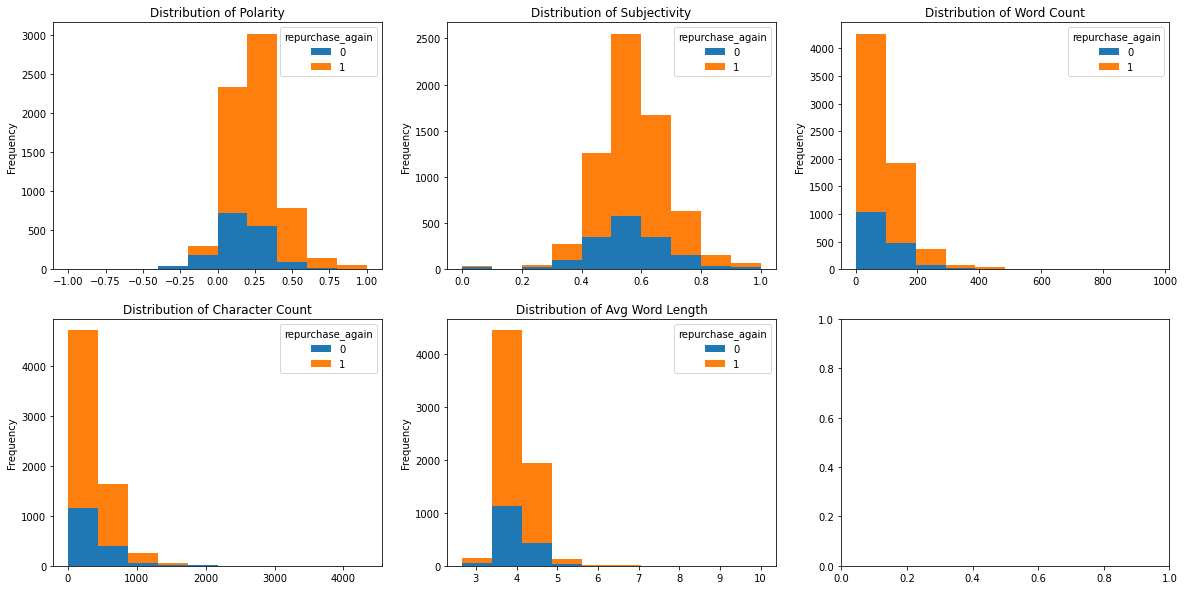

In [58]:
# Histogram of new features
fig, ax = plt.subplots(2,3,figsize=(20,10))
products.pivot(columns='repurchase_again').polarity.plot(kind = 'hist',stacked=True,ax=ax[0,0])
ax[0,0].title.set_text('Distribution of Polarity')
products.pivot(columns='repurchase_again').subjectivity.plot(kind = 'hist',stacked=True, ax=ax[0,1])
ax[0,1].title.set_text('Distribution of Subjectivity')
products.pivot(columns='repurchase_again').word_count.plot(kind = 'hist',stacked=True,ax=ax[0,2])
ax[0,2].title.set_text('Distribution of Word Count')
products.pivot(columns='repurchase_again').char_count.plot(kind = 'hist',stacked=True,ax=ax[1,0])
ax[1,0].title.set_text('Distribution of Character Count')
products.pivot(columns='repurchase_again').avg_word_length.plot(kind = 'hist',stacked=True,ax= ax[1,1])
ax[1,1].title.set_text('Distribution of Avg Word Length')

<AxesSubplot:title={'center':'avg_word_length'}, xlabel='repurchase_again'>

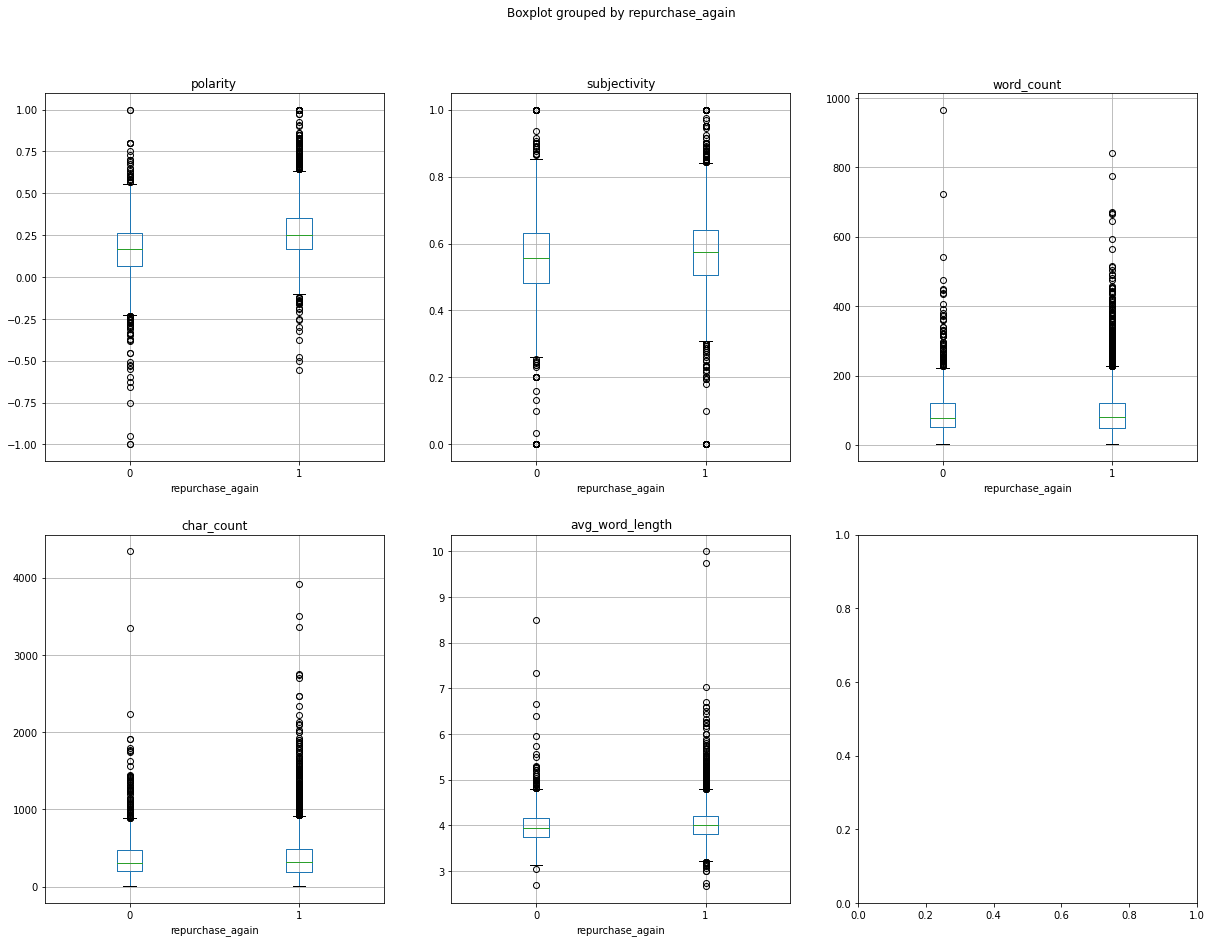

In [59]:
# Boxplot of new features
fig, ax = plt.subplots(2,3,figsize=(20,15))
products.boxplot('polarity',by='repurchase_again',ax=ax[0,0])
products.boxplot('subjectivity',by='repurchase_again',ax=ax[0,1])
products.boxplot('word_count',by='repurchase_again',ax=ax[0,2])
products.boxplot('char_count',by='repurchase_again',ax=ax[1,0])
products.boxplot('avg_word_length',by='repurchase_again',ax=ax[1,1])

# Those who repurchase again have higher polarity, higher subjectivity, similar word count, similar character count, higher average word length compared to those who don't repurchase again

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

NameError: name 'X' is not defined

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)